видео с ютуба <a href="http://www.youtube.com/watch?v=zlWiw99bBUk">Парсинг Avito.ru при помощи Python 3</a>

In [1]:
import requests
from bs4 import BeautifulSoup

import csv
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from pylab import rcParams
from random import randint
from time import sleep

In [2]:
import avito_parse_func
from avito_parse_func import get_html, get_total_pages, get_page_data

план
    1. Выяснить количество страниц
    2. сформировать список урлов на страницы выдачи
    3. собрать данные

In [3]:
def write_csv(data):
    with open('avito_kotofey.csv', 'a', encoding='utf-8') as f: #'a' - добавляет данные
        writer = csv.writer(f)
        writer.writerow( (data['url'],
                          data['title'],
                          data['price']) )

In [4]:
def add_to_df(data):
    df.append(data, ignore_index=False)

In [5]:
def sp500(x):
    if ( (x-(x//1000)*1000 >= 745) ):
        return (x//1000)*10+10
    if ( (x-(x//1000)*1000 >= 245) and (x-(x//1000)*1000 < 745) ):
        return (x//1000)*10+5
    if ( (x-(x//1000)*1000 < 245) ):
        return (x//1000)*10
    return 0

In [6]:
def get_dataframe(base_url, base_query_url, query_parts):
    df = pd.DataFrame(columns=['title', 'price', 'url', 'id_'])
    #page_part = 'p=' #тут будем подставлять номера страниц
    sleep(randint(0,5))
    for query_part in tqdm(query_parts):
        url = base_query_url + '&q='+ query_part
        #'https://www.avito.ru/rostov-na-donu/tovary_dlya_detey_i_igrushki/detskie_kolyaski?q=zippy'
        r = get_html(url)
        total_pages = get_total_pages(r)
        soup = BeautifulSoup(r, 'lxml')
        pages = soup.find('div', class_='pagination-pages')
        for i in range(1, total_pages+1):
            url_gen = base_url + 'p=' + str(i) + '&q=' + query_part
            html = get_html(url_gen)
            df = get_page_data(html, df)
        sleep(randint(0,3))
    return df

---------------
### тут делем вызовы функций 

In [7]:
#https://www.avito.ru/rostov-na-donu?sgtd=12&q=коляска+2+в+1
#url = 'https://www.avito.ru/rostov-na-donu/tovary_dlya_detey_i_igrushki/detskie_kolyaski?q=%D0%BA%D0%BE%D0%BB%D1%8F%D1%81%D0%BA%D0%B0%202%20%D0%B2%201'
#url = 'https://www.avito.ru/rostov-na-donu/tovary_dlya_detey_i_igrushki/detskie_kolyaski?q=zippy'
#https://www.avito.ru/rostov-na-donu/tovary_dlya_detey_i_igrushki/detskie_kolyaski?user=1

In [8]:
#это тот урл, который мы получаем при первом запросе
#base_query_url = 'https://www.avito.ru/rostov-na-donu/'
base_query_url = 'https://www.avito.ru/rossiya'
#https://www.avito.ru/labinsk/tovary_dlya_detey_i_igrushki/
#https://www.avito.ru/rostov-na-donu/hobbi_i_otdyh/

In [9]:
#тут урл до номера страниц
#будет использован для перебора страниц
#base_url = 'https://www.avito.ru/rostov-na-donu?'
base_url = 'https://www.avito.ru/rossiya?'

In [10]:
query_parts = ['ботинки+детские+котофей'] #'Anex' 

In [11]:
url = base_url + 'q='+ query_parts[0]

In [12]:
url

'https://www.avito.ru/rossiya?q=ботинки+детские+котофей'

In [15]:
from avito_parse_func import get_random_user_agent

In [20]:
header = get_random_user_agent()

In [21]:
header

{'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1468.0 Safari/537.36'}

In [40]:
#header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141'}
header = {
  'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
  'accept-encoding':'gzip, deflate, br',
  'accept-language':'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7',
  'cache-control':'no-cache',
  'dnt': '1',
  'pragma': 'no-cache',
  'sec-fetch-mode': 'navigate',
  'sec-fetch-site': 'none',
  'sec-fetch-user': '?1',
  'upgrade-insecure-requests': '1',
  'user-agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36'}


In [43]:
url = 'https://www.avito.ru/rossiya?q=ботинки+детские+котофей'

In [46]:
session = requests.Session()
session.headers = header
session.timeout=2
r = session.get(url)

In [41]:
r = requests.get(, 
                 headers = header,
                 #verify=True, 
                 timeout=2,
                )

In [47]:
r

<Response [403]>

In [37]:
#r.text

In [13]:
r = get_html(url)

'<!DOCTYPE html>\n<!--[if lte IE 8]><html class="lte-ie8"><![endif]-->\n<!--[if gt IE 8]><!--><html><!--<![endif]-->\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <title>Доступ с вашего IP-адреса временно ограничен — Авито</title>\n    <style>\n        html,\n        body {\n            height: 100%;\n        }\n        body {\n            background-color: #fff;\n            font: 14px/1.5 Arial, "Helvetica Neue", Helvetica, sans-serif;\n            color: #000;\n            margin: 0;\n        }\n        h1 {\n            margin: 0;\n            font-size: 27px;\n            font-weight: 300;\n            line-height: 30px;\n        }\n        h4 {\n            font-size: 14px;\n            line-height: 20px;\n            margin: 0 0 16px;\n        }\n        a {\n            text-decoration: none;\n            co
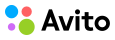

In [14]:
r

In [39]:
df = get_dataframe(base_url, base_query_url, query_parts)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
#df[]

In [ ]:
df.count()[0]

In [ ]:
df.head()

In [ ]:
df.to_csv('./avito_mi2.csv')

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df[df['price']>0]['price'].quantile(.001)

In [ ]:
df['price'].quantile(.99), df['price'].quantile(.9999), df['price'].max()

In [ ]:
df_clean = df[(df['price']>df[df['price']>0]['price'].quantile(.01))&(df['price']<df['price'].quantile(.85))]

In [ ]:
#df_clean = df[(df['price']>df['price'].quantile(.05)) & (df_clean['price'] < df['price'].quantile(.97))]

In [ ]:
#sns.boxplot(df_clean['price'])
sns.set_style("whitegrid")

In [ ]:
rcParams['figure.figsize'] = 8, 5
sns.boxplot(x = df_clean['price'])

In [ ]:
df_clean['price_group'] = df['price'].apply(lambda x: sp500(x))

In [ ]:
gr = df_clean.groupby('price_group')['id_'].count()

In [ ]:
rcParams['figure.figsize'] = 15, 12
sns.barplot(gr.index,  gr.values)

In [ ]:
#df_clean[df_clean['price']<=15000].to_csv('./avito_zippy_001.csv')

In [ ]:
#проверка на уникальность индексов
gr = df.groupby('id_')['price'].count()
pd.unique(gr.sort_values(ascending=False).values)

In [ ]:
df[df.index == 980676811]

In [ ]:
df['price'].describe()

In [ ]:
for i in df[df['price']<1500]['url']:
    print(i)

---------------------

In [5]:
htm = get_html('https://www.avito.ru/rossiya?p=3&q=ботинки+детские+котофей')

In [4]:
with open("kotofey_html3.html", encoding='utf-8') as fin:
    htm = fin.read()

In [17]:
#htm

In [67]:
def get_page_data(html, df):
    soup = BeautifulSoup(html, 'lxml')    
    ads = soup.find('div',class_=re.compile('^items-items')).find_all('div', class_=re.compile('^iva-item-body-'))
    for ad in ads:
        #title, url, price, id?
        try:
            #title = ad.find('div', class_ = 'description').find('h3').text.strip()
            title = ad.find('span',class_=re.compile('^title-root')).text.strip()
        except:
            title = ''
        try:
            #url = ad.find('div', class_ = 'description').find('h3').find('a').get('href')
            url = ad.find('a',class_=re.compile('^link-link'))['href'] #.text.strip()
        except:
            url = ''
        try:
            #price = int(ad.find('div', class_ = 'about').text.strip().replace(' руб.', '').replace(' ', '').replace('₽', ''))
            price = int(ad.find('meta',itemprop='price')['content'])
        except:
            price = 0 #заменить на Nan
        try:
            #id_=int(ad.get("id").replace('i',''))
            id_ = int(url.split('/')[-1].split('?')[0].split('_')[-1])
        except:
            id_ = 0
        try:
            #id_=int(ad.get("id").replace('i',''))
            location = ad.find('div',class_=re.compile('^geo-root')).find('span').find('span').text.strip()
        except:
            location = 'unknown'
        data = {
            'id_': id_,
            'title': title, 
            'price': price,
            'url': 'https://www.avito.ru' + url,
            'location': location,
        }    
        #write_csv(data)
        #add_to_df(data)
            
        if df[df.index == data['id_']]['id_'].count() == 0:
            #print(data['id_'])
            sr = pd.Series(data, name=data['id_'])
            df = df.append(sr)
            
    return df

In [7]:
soup = BeautifulSoup(htm, 'lxml')

In [8]:
soup

<!DOCTYPE html>
<html> <head> <script nonce="bIgwOzLrAtbFXXsudgbPLA==">
 try {
 window.firstHiddenTime = document.visibilityState === 'hidden' ? 0 : Infinity;
 document.addEventListener('visibilitychange', function (event) {
 window.firstHiddenTime = Math.min(window.firstHiddenTime, event.timeStamp);
 }, { once: true });
 if ('PerformanceLongTaskTiming' in window) {
 var globalStats = window.__statsLongTasks = { tasks: [] };
 globalStats.observer = new PerformanceObserver(function(list) {
 globalStats.tasks = globalStats.tasks.concat(list.getEntries());
 });
 globalStats.observer.observe({ entryTypes: ['longtask'] });
 }
 if (PerformanceObserver && (PerformanceObserver.supportedEntryTypes || []).some(function(e) {
 return e === 'element'
 })) {
 if (!window.oet) {
 window.oet = [];
 }
 new PerformanceObserver(function(l) {
 window.oet.push.apply(window.oet, l.getEntries());
 }).observe({ entryTypes: ['element'] });
 }
 } catch (e) {
 console.error(e);
 }
 </script>
<script nonce="bIgwO

In [9]:
import re

In [ ]:
re.compile('')

In [10]:
ads = soup.find('div', class_='items-items-38oUm')

In [26]:
ads = soup.find_all(re.compile("(\W|^)support(\W|$)"))#.find_all('div')#.find_all('div', data_marker_='item')

In [12]:
ads = soup.find('div',class_=re.compile('^items-items')).find_all('div', class_=re.compile('^iva-item-body-'))

In [16]:
ads[1]

<div class="iva-item-body-NPl6W"><div class="iva-item-titleStep-2bjuh"><a class="link-link-39EVK link-design-default-2sPEv title-root-395AQ iva-item-title-1Rmmj title-listRedesign-3RaU2 title-root_maxHeight-3obWc" data-marker="item-title" href="/moskva/detskaya_odezhda_i_obuv/botinki_detskie_firma_kotofey_1936555537?slocation=621540" itemprop="url" rel="noopener" target="_blank" title="Ботинки детские фирма котофей в Москве"><span class="title-root-395AQ iva-item-title-1Rmmj title-listRedesign-3RaU2 title-root_maxHeight-3obWc text-text-1PdBw text-size-s-1PUdo text-bold-3R9dt" itemprop="name">Ботинки детские фирма котофей</span></a></div><div class="iva-item-priceStep-2qRpg"><span class="price-root-1n2wM price-listRedesign-2OaSA"><span class="price-price-32bra" data-marker="item-price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer"><meta content="RUB" itemprop="priceCurrency"/><meta content="1600" itemprop="price"/><meta content="https://schema.org/LimitedAvailability

In [13]:
len(ads)

51

In [ ]:
find('div', class_ = 'description').find('h3').text.strip()

In [24]:
url = ads[1].find('a',class_=re.compile('^link-link'))['href'] #.text.strip()

In [25]:
url

'/moskva/detskaya_odezhda_i_obuv/botinki_detskie_firma_kotofey_1936555537?slocation=621540'

In [27]:
title = ads[1].find('span',class_=re.compile('^title-root')).text.strip()

In [28]:
title

'Ботинки детские фирма котофей'

In [33]:
price = int(ads[1].find('meta',itemprop='price')['content'])

In [34]:
price

1600

In [48]:
url = '/moskva/detskaya_odezhda_i_obuv/kotofey_1936555537?slocation=621540'

In [49]:
id_ = int(url.split('/')[-1].split('?')[0].split('_')[-1])

In [50]:
id_

1936555537

In [46]:
ads[2]

<div class="iva-item-body-NPl6W"><div class="iva-item-titleStep-2bjuh"><a class="link-link-39EVK link-design-default-2sPEv title-root-395AQ iva-item-title-1Rmmj title-listRedesign-3RaU2 title-root_maxHeight-3obWc" data-marker="item-title" href="/novocherkassk/detskaya_odezhda_i_obuv/botinki_detskie_kotofey._razmer_23_1762108141" itemprop="url" rel="noopener" target="_blank" title="Ботинки детские Котофей. Размер 23 в Новочеркасске"><span class="title-root-395AQ iva-item-title-1Rmmj title-listRedesign-3RaU2 title-root_maxHeight-3obWc text-text-1PdBw text-size-s-1PUdo text-bold-3R9dt" itemprop="name">Ботинки детские Котофей. Размер 23</span></a></div><div class="iva-item-priceStep-2qRpg"><span class="price-root-1n2wM price-listRedesign-2OaSA"><span class="price-price-32bra" data-marker="item-price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer"><meta content="RUB" itemprop="priceCurrency"/><meta content="1200" itemprop="price"/><meta content="https://schema.org/Limited

In [24]:
pages = soup.find('div', class_='pagination-pages').find_all('a', class_='pagination-page')[-1].get('href')

In [25]:
pages

'/rossiya?p=100&localPriority=0&q=%D0%B1%D0%BE%D1%82%D0%B8%D0%BD%D0%BA%D0%B8+%D0%B4%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B5+%D0%BA%D0%BE%D1%82%D0%BE%D1%84%D0%B5%D0%B9'

In [30]:
total_pages = pages.split('=')[1].split('&')[0]

In [31]:
total_pages

'100'

In [60]:
location = ads[1].find('div',class_=re.compile('^geo-root')).find('span').find('span').text.strip()

In [61]:
location

'Москва'

In [68]:
df = pd.DataFrame(columns=['title', 'price', 'url', 'id_', 'location'])

In [69]:
df_01 = get_page_data(htm, df)

In [72]:
df_01['id_'].count()

51